# Cyclistic: EDA with Python

## Import and Load Data
After completing data preparation, which includes cleaning and validation using SQL, we proceed with Exploratory Data Analysis (EDA) in Python. The tools employed for this analysis are Python and its libraries, such as pandas, matplotlib, and seaborn, all running within a Jupyter Notebook environment.

In [1]:
# Import necessary library
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Configure float and integer display format to include thousands separators and maintain two decimal places
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

First, we import the cleaned data from CSV files into Python pandas dataframes for further analysis. The process begins by loading data from the `trips` data table, which includes data type casting within the pandas dataframes.

In [2]:
# Define initial data types for the 'trips' dataframe
trips_dtypes = {
    'trip_id': 'int',
    'starttime': 'string',
    'stoptime': 'string',
    'bikeid': 'int',
    'tripduration': 'int',
    'from_station_id': 'int',
    'from_station_name': 'string',
    'to_station_id': 'int',
    'to_station_name': 'string',
    'usertype': 'category',
    'gender': 'category',
    'birthyear': 'Int64'
}

# Load data from the 'trips' data table
trips_df = pd.read_csv(r"clean_data_source/202310051326_cyclistic_trips.csv", dtype=trips_dtypes)
trips_df

trip_id                starttime                 stoptime  bikeid  \
0        9441033  2016-05-06 10:39:00.000  2016-05-06 10:58:00.000    1417   
1        9441032  2016-05-06 10:39:00.000  2016-05-06 11:04:00.000    1640   
2        9441021  2016-05-06 10:38:00.000  2016-05-06 11:03:00.000    3995   
3        9441015  2016-05-06 10:38:00.000  2016-05-06 11:05:00.000    4349   
4        9441013  2016-05-06 10:38:00.000  2016-05-06 11:04:00.000    1535   
...          ...                      ...                      ...     ...   
3595234  9441045  2016-05-06 10:40:00.000  2016-05-06 10:52:00.000    3349   
3595235  9441044  2016-05-06 10:39:00.000  2016-05-06 10:58:00.000      94   
3595236  9441040  2016-05-06 10:39:00.000  2016-05-06 11:02:00.000     833   
3595237  9441035  2016-05-06 10:39:00.000  2016-05-06 10:53:00.000     762   
3595238  9441034  2016-05-06 10:39:00.000  2016-05-06 11:03:00.000    3145   

         tripduration  from_station_id          from_station_name  \
0                1194               49    Dearborn St & Monroe St   
1                1524              305  Western Ave & Division St   
2                1445                6             Dusable Harbor   
3                1599               35    Streeter Dr & Grand Ave   
4                1589               35    Streeter Dr & Grand Ave   
...               ...              ...                        ...   
3595234           721               94    Clark St & Armitage Ave   
3595235          1134               49    Dearborn St & Monroe St   
3595236          1394                6             Dusable Harbor   
3595237           857              142       McClurg Ct & Erie St   
3595238          1466              156  Clark St & Wellington Ave   

         to_station_id              to_station_name  usertype gender  \
0                   35      Streeter Dr & Grand Ave  Customer    NaN   
1                  117     Wilton Ave & Belmont Ave  Customer    NaN   
2                   35      Streeter Dr & Grand Ave  Customer    NaN   
3                  140  Dearborn Pkwy & Delaware Pl  Customer    NaN   
4                  140  Dearborn Pkwy & Delaware Pl  Customer    NaN   
...                ...                          ...       ...    ...   
3595234            268   Lake Shore Dr & North Blvd  Customer    NaN   
3595235             35      Streeter Dr & Grand Ave  Customer    NaN   
3595236             35      Streeter Dr & Grand Ave  Customer    NaN   
3595237            174        Canal St & Madison St  Customer    NaN   
3595238            326        Clark St & Leland Ave  Customer    NaN   

         birthyear  
0             <NA>  
1             <NA>  
2             <NA>  
3             <NA>  
4             <NA>  
...            ...  
3595234       <NA>  
3595235       <NA>  
3595236       <NA>  
3595237       <NA>  
3595238       <NA>  

[3595239 rows x 12 columns]

In [3]:
# Cast data types for specific columns
trips_df["starttime"] = pd.to_datetime(trips_df["starttime"])
trips_df["stoptime"] = pd.to_datetime(trips_df["stoptime"])
trips_df["tripduration"] = pd.to_timedelta(trips_df["tripduration"], unit='second')

trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3595239 entries, 0 to 3595238
Data columns (total 12 columns):
 #   Column             Dtype          
---  ------             -----          
 0   trip_id            int64          
 1   starttime          datetime64[ns] 
 2   stoptime           datetime64[ns] 
 3   bikeid             int64          
 4   tripduration       timedelta64[ns]
 5   from_station_id    int64          
 6   from_station_name  string         
 7   to_station_id      int64          
 8   to_station_name    string         
 9   usertype           category       
 10  gender             category       
 11  birthyear          Int64          
dtypes: Int64(1), category(2), datetime64[ns](2), int64(4), string(2), timedelta64[ns](1)
memory usage: 284.6 MB


Moving on to `stations` data table, do the same data-types casting process.

In [4]:
# Define initial data types for the 'stations' dataframe
stations_dtypes = {
    'station_name': 'string',
    'online_date': 'string',
    'longitude': 'float',
    'latitude': 'float',
    'id': 'int',
    'dpcapacity': 'int'
}

# Load data from the 'stations' data table
stations_df = pd.read_csv(r"clean_data_source/202310051326_cyclistic_stations.csv", dtype=stations_dtypes)
stations_df

id                  station_name  latitude  longitude  dpcapacity  \
0    456           2112 W Peterson Ave     41.99     -87.68          15   
1    101                 63rd St Beach     41.78     -87.58          23   
2    109             900 W Harrison St     41.87     -87.65          19   
3     21    Aberdeen St & Jackson Blvd     41.88     -87.65          15   
4     80       Aberdeen St & Monroe St     41.88     -87.66          19   
..   ...                           ...       ...        ...         ...   
576  317           Wood St & Taylor St     41.87     -87.67          23   
577  248        Woodlawn Ave & 55th St     41.80     -87.60          19   
578  569        Woodlawn Ave & 75th St     41.76     -87.60          15   
579  413  Woodlawn Ave & Lake Park Ave     41.81     -87.60          15   
580  396          Yates Blvd & 75th St     41.76     -87.57          11   

    online_date  
0    2015-05-12  
1    2015-04-20  
2    2013-08-06  
3    2013-06-21  
4    2013-06-26  
..          ...  
576  2013-09-21  
577  2013-08-23  
578  2016-06-23  
579  2015-04-14  
580  2015-05-07  

[581 rows x 6 columns]

In [5]:
# Cast data types for specific columns
stations_df["online_date"] = pd.to_datetime(stations_df["online_date"])

stations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            581 non-null    int64         
 1   station_name  581 non-null    string        
 2   latitude      581 non-null    float64       
 3   longitude     581 non-null    float64       
 4   dpcapacity    581 non-null    int64         
 5   online_date   581 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), string(1)
memory usage: 27.4 KB


## Ensure NULLs and Validations
As we migrate the data from SQL DBeaver to Python Pandas, it's essential to conduct a quick check to ensure data integrity.

In [6]:
# Count NULL values in each columns
stations_df.isnull().sum()

id              0
station_name    0
latitude        0
longitude       0
dpcapacity      0
online_date     0
dtype: int64

In [7]:
# Count unique values in each columns
stations_df.nunique()

id              581
station_name    581
latitude        575
longitude       570
dpcapacity       13
online_date     140
dtype: int64

In [8]:
# Count NULL values in each columns
trips_df.isnull().sum()

trip_id                   0
starttime                 0
stoptime                  0
bikeid                    0
tripduration              0
from_station_id           0
from_station_name         0
to_station_id             0
to_station_name           0
usertype                  0
gender               858393
birthyear            858089
dtype: int64

In [9]:
# Count unique values in each columns
trips_df.nunique()

trip_id              3595239
starttime            2041405
stoptime             1973697
bikeid                  5748
tripduration           18056
from_station_id          581
from_station_name        581
to_station_id            581
to_station_name          581
usertype                   2
gender                     2
birthyear                 78
dtype: int64

Upon reviewing the results of this quick check, we observe that the NULL values are present in the expected fields. Furthermore, categorical data fields such as `gender`, `usertype`, `from_station_id`, etc., have the anticipated count of unique values.




## Explore with Descriptive Statistic and Quick Data Visualization 
We'll begin exploring the data and uncovering insights using descriptive statistics, such as minimum, maximum, and count. Additionally, the ability to create quick and highly customizable data visualizations in Python will aid us in better understanding the data and extracting valuable insights.

### User-type's Trip Frequency in 2016
Let's start with a fundamental analysis to understand how each user type differs in terms of trip counts or frequency.

In [10]:
# Create trip count aggregate per user-type
trip_count_by_user = trips_df.groupby('usertype', observed=False)['trip_id'].count()
trip_count_by_user

usertype
Customer       858438
Subscriber    2736801
Name: trip_id, dtype: int64

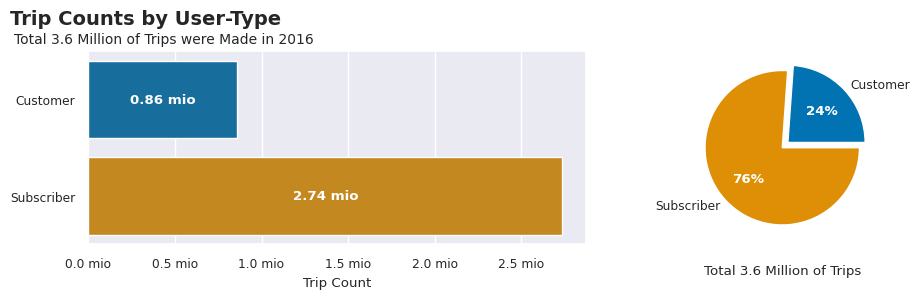

In [11]:
# Set global theme for visualization
sns.set_theme(style='darkgrid', palette='colorblind', font_scale=0.8)

# Create visualization
# Create plt figures and grids 
gs = plt.GridSpec(1, 2, width_ratios=[5, 4])
fig = plt.figure(figsize=(10, 3))
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
# Add Figure title and subtitle
fig.suptitle('Trip Counts by User-Type', x=0.15, y=0.98, fontsize=14, fontweight='bold')
fig.text(0.018, 0.868, 'Total {:,.1f} Million of Trips were Made in 2016'.format(trip_count_by_user.values.sum()/1000000), 
         fontsize=10, fontweight='light')

# Add Seaborn visualization (1), barplot
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000000) + ' mio'))
sns.barplot(ax=ax1, y=trip_count_by_user.index, x=trip_count_by_user.values, orient='y', hue=trip_count_by_user.index)
# Set axis label
ax1.set_xlabel('Trip Count')
ax1.set_ylabel('')
# Add data label in barplot
for container in ax1.containers:
    ax1.bar_label(container, label_type='center', fmt=ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + ' mio'), 
                  color='white', fontweight='bold')

# Add visualization (2), piechart
wedges, texts, autotexts = ax2.pie(trip_count_by_user.values, labels=trip_count_by_user.index, autopct='%.0f%%', explode=[0.1,0])
# Format percentages text label in piechart
for percentage in autotexts:
    percentage.set(color='white', fontweight='bold')
# Set subplot title
ax2.set_title('Total {:,.1f} Million of Trips'.format(trip_count_by_user.values.sum()/1000000), y=-0.2)

# Adjust the figure layout and display
fig.tight_layout()
plt.show()

It's evident that "Subscribers" significantly contributed to the total trips made in 2016, with more than three times the trip frequency of "Customers." The "Customer" user type, on the other hand, accounted for approximately 860,000 trips, which corresponds to 24% of the total trip frequency in 2016.

### Trip Duration Analysis
Now, we'll delve into the analysis of trip durations. First, we'll perform descriptive statistics on this attribute.

In [12]:
# Do descriptive statistic on 'tripduration' attribute for each user-type
trips_df.groupby('usertype', observed=False)['tripduration'].describe()

count                       mean                        std  \
usertype                                                                    
Customer     858438  0 days 00:30:56.612912056  0 days 00:50:03.461004927   
Subscriber  2736801  0 days 00:12:02.247028921  0 days 00:20:45.087419557   

                        min              25%              50%  \
usertype                                                        
Customer    0 days 00:01:00  0 days 00:15:07  0 days 00:22:33   
Subscriber  0 days 00:01:00  0 days 00:05:56  0 days 00:09:37   

                        75%              max  
usertype                                      
Customer    0 days 00:31:50  0 days 23:59:25  
Subscriber  0 days 00:15:17  0 days 23:57:03

As seen in the results, the means and medians (50th percentile) range to maximum values shows a wide gap, compared to its range to the minimum values. This indicates the presence of outliers. To further confirm the existence of outliers, we'll create box plots or histograms for visualization.

In [13]:
# Define a function to format timedelta dtype
def strfdelta(tdelta, fmt="{h:0>2}:{m:0>2}:{s:0>2}"):
    if tdelta < pd.to_timedelta(0, unit="S"):
        return '-' + strfdelta(-tdelta, fmt)
    else:
        d = {"d": tdelta.days}
        d["h"], rem = divmod(tdelta.seconds, 3600)
        d["m"], d["s"] = divmod(rem, 60)
        return fmt.format(**d)

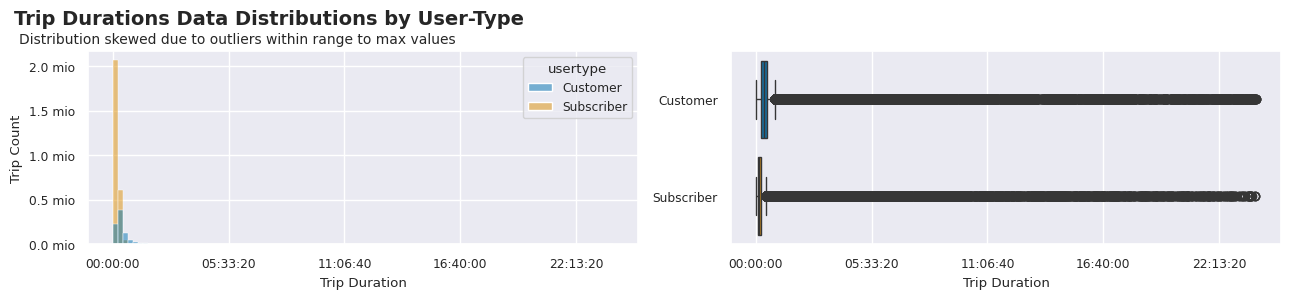

In [14]:
# Create a copy to maintain the original dataframe
trip_duration_by_user = trips_df.copy()
# Convert timedelta dtype to float for compatibility with visualization functions
trip_duration_by_user['tripduration'] = trip_duration_by_user['tripduration'].dt.total_seconds()

# Create visualization
# Create plt figures and grids 
fig, ax= plt.subplots(1, 2, figsize=(13, 3))

# Add figure title and subtitle
fig.suptitle('Trip Durations Data Distributions by User-Type', x=0.21, y=0.98, fontsize=14, fontweight='bold')
fig.text(0.018, 0.868, 'Distribution skewed due to outliers within range to max values', 
         fontsize=10, fontweight='light')

# Create a histogram visualization
sns.histplot(data=trip_duration_by_user, ax=ax[0], x="tripduration", hue="usertype", bins=100)
# Set axis ticks number formatter
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000000) + ' mio'))
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(strfdelta(pd.to_timedelta(x, unit='S')))))
# Set axis labels
ax[0].set_ylabel('Trip Count')
ax[0].set_xlabel('Trip Duration')

# Create a boxplot visualization
sns.boxplot(data=trip_duration_by_user, ax=ax[1], y='usertype', x='tripduration', hue="usertype")
# Set axis labels
ax[1].set_ylabel('')
ax[1].set_xlabel('Trip Duration')
# Set axis ticks number formatter
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(strfdelta(pd.to_timedelta(x, unit='S')))))

# Adjust the figure layout and display
fig.tight_layout()
plt.show()

As expected, the visualizations clearly identify numerous outliers in the range towards the maximum values. Outliers significantly impact statistical measures such as means and medians. Therefore, we need to define and investigate these outliers to understand their causes. It's essential to recognize whether the outliers are due to errors or represent natural occurrences in the data.

To define the outliers, we'll utilize the Interquartile Range (IQR) or John Tukey's fence method. This method defines bounds for outliers using quartiles, specifically the lower bound (Q1 - 1.5 * IQR) and upper bound (Q3 + 1.5 * IQR). We will find outliers separately for each user-type dataset, as different user-types may exhibit distinct behaviors.

In [15]:
# Function to identify outliers
def find_outliers_IQR(df, field_name):
    q1 = df[field_name].quantile(0.25)
    q3 = df[field_name].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    outliers = df[((df[field_name] < (lower_bound)) | (df[field_name] > (upper_bound)))]
    not_outliers = df[~((df[field_name] < (lower_bound)) | (df[field_name] > (upper_bound)))]
    return outliers, not_outliers, lower_bound, upper_bound

Now, we'll find and describe the outliers.

In [16]:
# Find outliers for 'Customer' data points
outliers_customer, not_outliers_customer, lower_bound_customer, upper_bound_customer = find_outliers_IQR(trip_duration_by_user[trip_duration_by_user['usertype'] == 'Customer'], 
                                                                                                         'tripduration')

# Find outliers for 'Subscriber' data points
outliers_subscriber, not_outliers_subscriber, lower_bound_subscriber, upper_bound_subscriber = find_outliers_IQR(trip_duration_by_user[trip_duration_by_user['usertype'] == 'Subscriber'], 
                                                                                                         'tripduration')

# Union both usertype data points for each group (i.e. outliers or not)
trip_duration_outliers = pd.concat([outliers_customer, outliers_subscriber])
trip_duration_not_outliers = pd.concat([not_outliers_customer, not_outliers_subscriber])

Let's describe the results based on the IQR method.


In [17]:
# Run descriptive statistic on IQR results
print(f'Lower Bound (Customer) used: {strfdelta(pd.to_timedelta(lower_bound_customer, unit="S"))}', 
      f'Upper Bound (Customer) used: {strfdelta(pd.to_timedelta(upper_bound_customer, unit="S"))}',
      f'Lower Bound (Subscriber) used: {strfdelta(pd.to_timedelta(lower_bound_subscriber, unit="S"))}',
      f'Upper Bound (Subscriber) used: {strfdelta(pd.to_timedelta(upper_bound_subscriber, unit="S"))}', sep='\n', end='\n\n')

print('trip_duration Non-Outliers Descriptive Statistics:',
      pd.to_timedelta(trip_duration_not_outliers['tripduration'], unit='S').describe(), sep='\n', end='\n\n')
print('trip_duration Non-Outliers Descriptive Statistics Grouped by User-Type:',
      trip_duration_not_outliers.assign(tripduration_td = lambda x: pd.to_timedelta(x['tripduration'], unit='S')).groupby('usertype', observed=False)['tripduration_td'].describe(), sep='\n', end='\n\n')

print('The outliers accounts for {:.2f}% of total trip_duration data'.format(trip_duration_outliers['tripduration'].count() / trip_duration_by_user['tripduration'].count() * 100))

Lower Bound (Customer) used: -00:09:57
Upper Bound (Customer) used: 00:56:54
Lower Bound (Subscriber) used: -00:08:05
Upper Bound (Subscriber) used: 00:29:18

trip_duration Non-Outliers Descriptive Statistics:
count                      3451663
mean     0 days 00:13:29.828825699
std      0 days 00:09:06.827939850
min                0 days 00:01:00
25%                0 days 00:06:37
50%                0 days 00:11:14
75%                0 days 00:18:21
max                0 days 00:56:54
Name: tripduration, dtype: object

trip_duration Non-Outliers Descriptive Statistics Grouped by User-Type:
              count                       mean                        std  \
usertype                                                                    
Customer     781737  0 days 00:22:30.606797426  0 days 00:11:14.726402669   
Subscriber  2669926  0 days 00:10:51.492546235  0 days 00:06:17.599241483   

                        min              25%              50%  \
usertype                     

Based on the IQR method, the bounds for defining outliers are set at above 56 minutes (Customer) and above 29 minutes (Subscriber). The outliers represent only 3.99% of the total trip duration data, leaving us with the remaining 96% concentrated in trips of less than one hour. The means and medians are lower, and there is less variation in this range.

Now, let's visualize the results to better understand the impact of removing outliers.

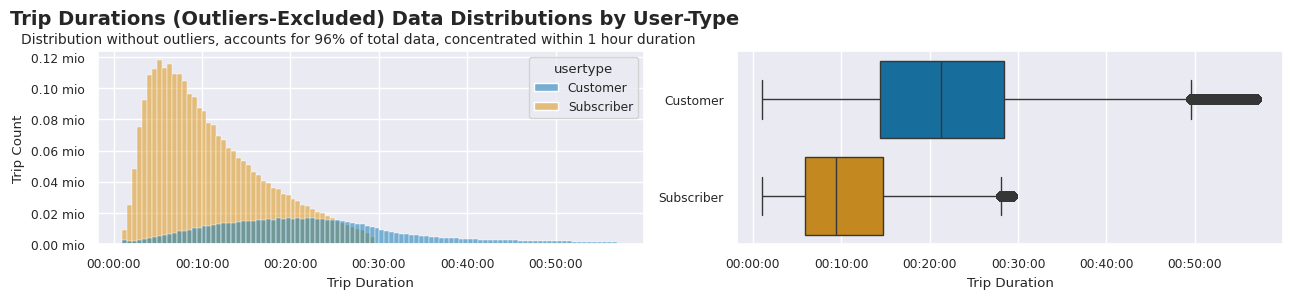

In [18]:
# Create visualization
# Create plt figures and grids 
fig, ax= plt.subplots(1, 2, figsize=(13, 3))

# Add Figure title and subtitle
fig.suptitle('Trip Durations (Outliers-Excluded) Data Distributions by User-Type', x=0.29, y=0.98, fontsize=14, fontweight='bold')
fig.text(0.018, 0.868, 'Distribution without outliers, accounts for 96% of total data, concentrated within 1 hour duration', 
         fontsize=10, fontweight='light')

# Create histogram visualization
sns.histplot(data=trip_duration_not_outliers, ax=ax[0], x="tripduration", hue="usertype", bins=100)
# Set axis ticker numbers format
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + ' mio'))
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(strfdelta(pd.to_timedelta(x, unit='S')))))
# Set custom x-axis ticker points
ax[0].set_xlim(right=3600)
ax[0].set_xticks(range(0, 3600, 600))
# Set axis label
ax[0].set_ylabel('Trip Count')
ax[0].set_xlabel('Trip Duration')

# Create a boxplot visualization
sns.boxplot(data=trip_duration_not_outliers, ax=ax[1], y='usertype', x='tripduration', hue="usertype")
# Set x-axis ticker numbers format
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(strfdelta(pd.to_timedelta(x, unit='S')))))
# Set custom x-axis ticker points
ax[1].set_xlim(right=3600)
ax[1].set_xticks(range(0, 3600, 600))
# Set axis label
ax[1].set_ylabel('')
ax[1].set_xlabel('Trip Duration')

# Adjust the figure layout and display
fig.tight_layout()
plt.show()

The visualizations show that the means and medians are now more consistent, and the data is concentrated within one hour of duration. This confirms that "Customers" tend to have longer trip durations compared to "Subscribers." Customers pay for a 24-hour pass for each trip, which may lead them to make longer trips to make the most of their pass. On the other hand, "Subscribers" have annual passes and tend to make shorter trips.

In [19]:
# Run descriptive statistic on IQR results, the outliers
print('trip_duration Outliers Descriptive Statistics:',
      pd.to_timedelta(trip_duration_outliers['tripduration'], unit='S').describe(), sep='\n', end='\n\n')
print('trip_duration Outliers Descriptive Statistics Grouped by User-Type:',
      trip_duration_outliers.assign(tripduration_td = lambda x: pd.to_timedelta(x['tripduration'], unit='S')).groupby('usertype', observed=False)['tripduration_td'].describe(), sep='\n', end='\n\n')

# Print unique values count
print(trip_duration_outliers.nunique())

trip_duration Outliers Descriptive Statistics:
count                       143576
mean     0 days 01:29:59.072769822
std      0 days 02:11:09.787485792
min                0 days 00:29:19
25%                0 days 00:35:11
50%                0 days 01:02:38
75%                0 days 01:30:37
max                0 days 23:59:25
Name: tripduration, dtype: object

trip_duration Outliers Descriptive Statistics Grouped by User-Type:
            count                       mean                        std  \
usertype                                                                  
Customer    76701  0 days 01:56:53.829923990  0 days 02:16:32.369586552   
Subscriber  66875  0 days 00:59:07.057988785  0 days 01:57:20.681383116   

                        min              25%              50%  \
usertype                                                        
Customer    0 days 00:56:55  0 days 01:06:40  0 days 01:22:17   
Subscriber  0 days 00:29:19  0 days 00:31:07  0 days 00:34:26   

        

Regarding the outliers, considering that their values are within a reasonable limit (24 hours), the possibility of natural occurrences, and the previous data cleaning and validation, it's advisable to keep the outliers as part of the observations. We can further investigate these outliers to uncover valuable insights or analyze potential causes for their existence.

Additionally, we've categorized trip durations into buckets based on ranges to better understand the data.

In [20]:
# Function to categorize trip duration into buckets of ranges
def tripduration_groups(tripduration: int) -> str:
    if tripduration < 3600 :
        return 'less than 1 hour'
    elif tripduration < 14400:
        return '1 to 4 hour'
    elif tripduration < 36000:
        return '4 to 10 hour'
    elif tripduration < 64800:
        return '10 to 18 hour'
    else:
        return '18 to 24 hour'

In [21]:
# Create a new column 'tripduration_groups' by applying the categorization function
trip_duration_by_user['tripduration_groups'] = trip_duration_by_user['tripduration'].apply(tripduration_groups)

# Check the dataframe after applying the function
print(trip_duration_by_user.head(), end='\n\n')
print(trip_duration_by_user.nunique(), end='\n\n')
# Count records by groups of trip duration
print(trip_duration_by_user.groupby('tripduration_groups', observed=False)['tripduration_groups'].count(), end='\n\n')
# Calculate the percentage of trips with less than 1-hour duration
print('Trips with less than 1 hour duration accounts for {:.2f}% of total trip_duration data'.format(trip_duration_by_user[(trip_duration_by_user['tripduration_groups'] == 'less than 1 hour')]['tripduration'].count() / trip_duration_by_user['tripduration'].count() * 100))

   trip_id           starttime            stoptime  bikeid  tripduration  \
0  9441033 2016-05-06 10:39:00 2016-05-06 10:58:00    1417      1,194.00   
1  9441032 2016-05-06 10:39:00 2016-05-06 11:04:00    1640      1,524.00   
2  9441021 2016-05-06 10:38:00 2016-05-06 11:03:00    3995      1,445.00   
3  9441015 2016-05-06 10:38:00 2016-05-06 11:05:00    4349      1,599.00   
4  9441013 2016-05-06 10:38:00 2016-05-06 11:04:00    1535      1,589.00   

   from_station_id          from_station_name  to_station_id  \
0               49    Dearborn St & Monroe St             35   
1              305  Western Ave & Division St            117   
2                6             Dusable Harbor             35   
3               35    Streeter Dr & Grand Ave            140   
4               35    Streeter Dr & Grand Ave            140   

               to_station_name  usertype gender  birthyear tripduration_groups  
0      Streeter Dr & Grand Ave  Customer    NaN       <NA>    less than 1 hou

Now, let's visualize the categorized data.


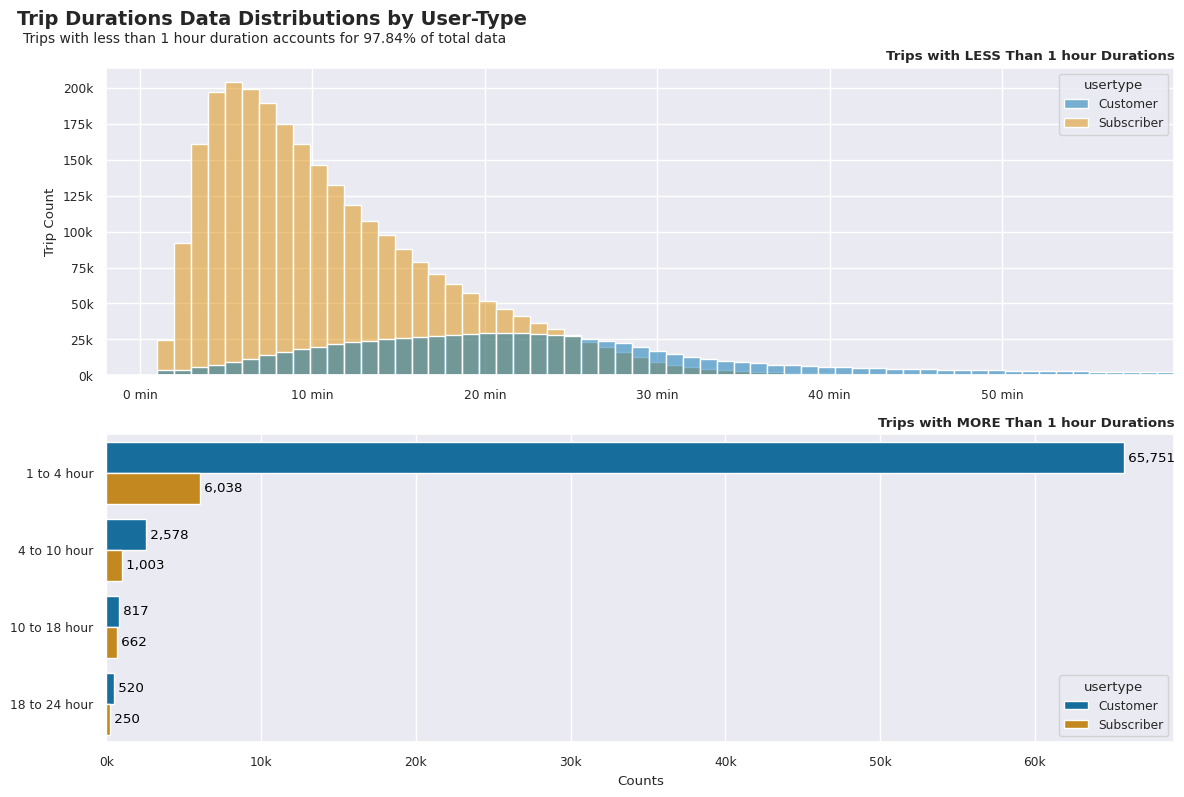

In [22]:
# Create visualization
# Create plt figures and grids 
fig, ax= plt.subplots(2, figsize=(12, 8))

# Add Figure title and subtitle
fig.suptitle('Trip Durations Data Distributions by User-Type', x=0.23, y=0.99, fontsize=14, fontweight='bold')
fig.text(0.023, 0.949, 'Trips with less than 1 hour duration accounts for 97.84% of total data', 
         fontsize=10, fontweight='light')

# Create a histogram visualization for trips with less than 1-hour duration
sns.histplot(data=trip_duration_by_user[(trip_duration_by_user['tripduration_groups'] == 'less than 1 hour')], ax=ax[0], x="tripduration", hue="usertype", bins=60)
# Set subplot title
ax[0].set_title('Trips with LESS Than 1 hour Durations', loc='right', fontweight='bold')
# Set axis ticker numbers format
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'k'))
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(strfdelta(pd.to_timedelta(x, unit='S'), '{m} min'))))
# Set custom x-axis ticker points
ax[0].set_xlim(right=3600)
ax[0].set_xticks(range(0, 3600, 600))
# Set axis label
ax[0].set_ylabel('Trip Count')
ax[0].set_xlabel('')

# Create a barplot visualization for trips with more than 1-hour duration
sns.countplot(ax=ax[1], data=trip_duration_by_user[(trip_duration_by_user['tripduration_groups'] != 'less than 1 hour')], 
              y='tripduration_groups', orient='y', hue='usertype')
# Set subplot title
ax[1].set_title('Trips with MORE Than 1 hour Durations', loc='right', fontweight='bold')
# Set axis ticker numbers format
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'k'))
# Set axis label
ax[1].set_ylabel('')
ax[1].set_xlabel('Counts')
# Add data labels in barplot
for container in ax[1].containers:
    ax[1].bar_label(container, fmt=ticker.FuncFormatter(lambda x, pos: ' {:,.0f}'.format(x)), 
                  color='black', fontweight='light')

# Adjust the figure layout and display
fig.tight_layout()
plt.show()

The visualizations provide further insights. Trips with less than 1-hour duration account for nearly 98% of the total data, and the distribution is concentrated in this range. As shown previously, "Customers" tend to make longer trips than "Subscribers," which aligns with their respective pass types.

### Time-Based Analysis
Let's examine how user behavior varies by time of day, day of the week, and month. Are there specific peak usage times for each user type?

In [23]:
# Create a copy to maintain original df form
trips_times_df = trips_df.copy()

# Create new columns to store time-specific attributes
trips_times_df = trips_times_df.assign(trip_start_hour=lambda x: x['starttime'].dt.strftime('%I %p'),
                      trip_start_day=lambda x: x['starttime'].dt.day_name().str.slice(stop=3),
                      trip_start_month=lambda x: x['starttime'].dt.month_name().str.slice(stop=3))

# Check the dataframe after column creation
print(trips_times_df.head(), end='\n\n')
print(trips_times_df.nunique(), end='\n\n')

   trip_id           starttime            stoptime  bikeid    tripduration  \
0  9441033 2016-05-06 10:39:00 2016-05-06 10:58:00    1417 0 days 00:19:54   
1  9441032 2016-05-06 10:39:00 2016-05-06 11:04:00    1640 0 days 00:25:24   
2  9441021 2016-05-06 10:38:00 2016-05-06 11:03:00    3995 0 days 00:24:05   
3  9441015 2016-05-06 10:38:00 2016-05-06 11:05:00    4349 0 days 00:26:39   
4  9441013 2016-05-06 10:38:00 2016-05-06 11:04:00    1535 0 days 00:26:29   

   from_station_id          from_station_name  to_station_id  \
0               49    Dearborn St & Monroe St             35   
1              305  Western Ave & Division St            117   
2                6             Dusable Harbor             35   
3               35    Streeter Dr & Grand Ave            140   
4               35    Streeter Dr & Grand Ave            140   

               to_station_name  usertype gender  birthyear trip_start_hour  \
0      Streeter Dr & Grand Ave  Customer    NaN       <NA>          

In [24]:
# Set the order of month categories 
month_order = pd.date_range("2000-01-01", periods=12, freq="M").month_name().str.slice(stop=3)
trips_times_df['trip_start_month'] = pd.Categorical(trips_times_df['trip_start_month'], categories=month_order)

# Set the order of day categories 
day_order = pd.date_range("2000-01-03", periods=7, freq="D").day_name().str.slice(stop=3)
trips_times_df['trip_start_day'] = pd.Categorical(trips_times_df['trip_start_day'], categories=day_order)

# Set the order of day categories 
hour_order = pd.date_range("2000-01-03 00:00:00", periods=24, freq="H").strftime('%I %p').tolist()
trips_times_df['trip_start_hour'] = pd.Categorical(trips_times_df['trip_start_hour'], categories=hour_order)

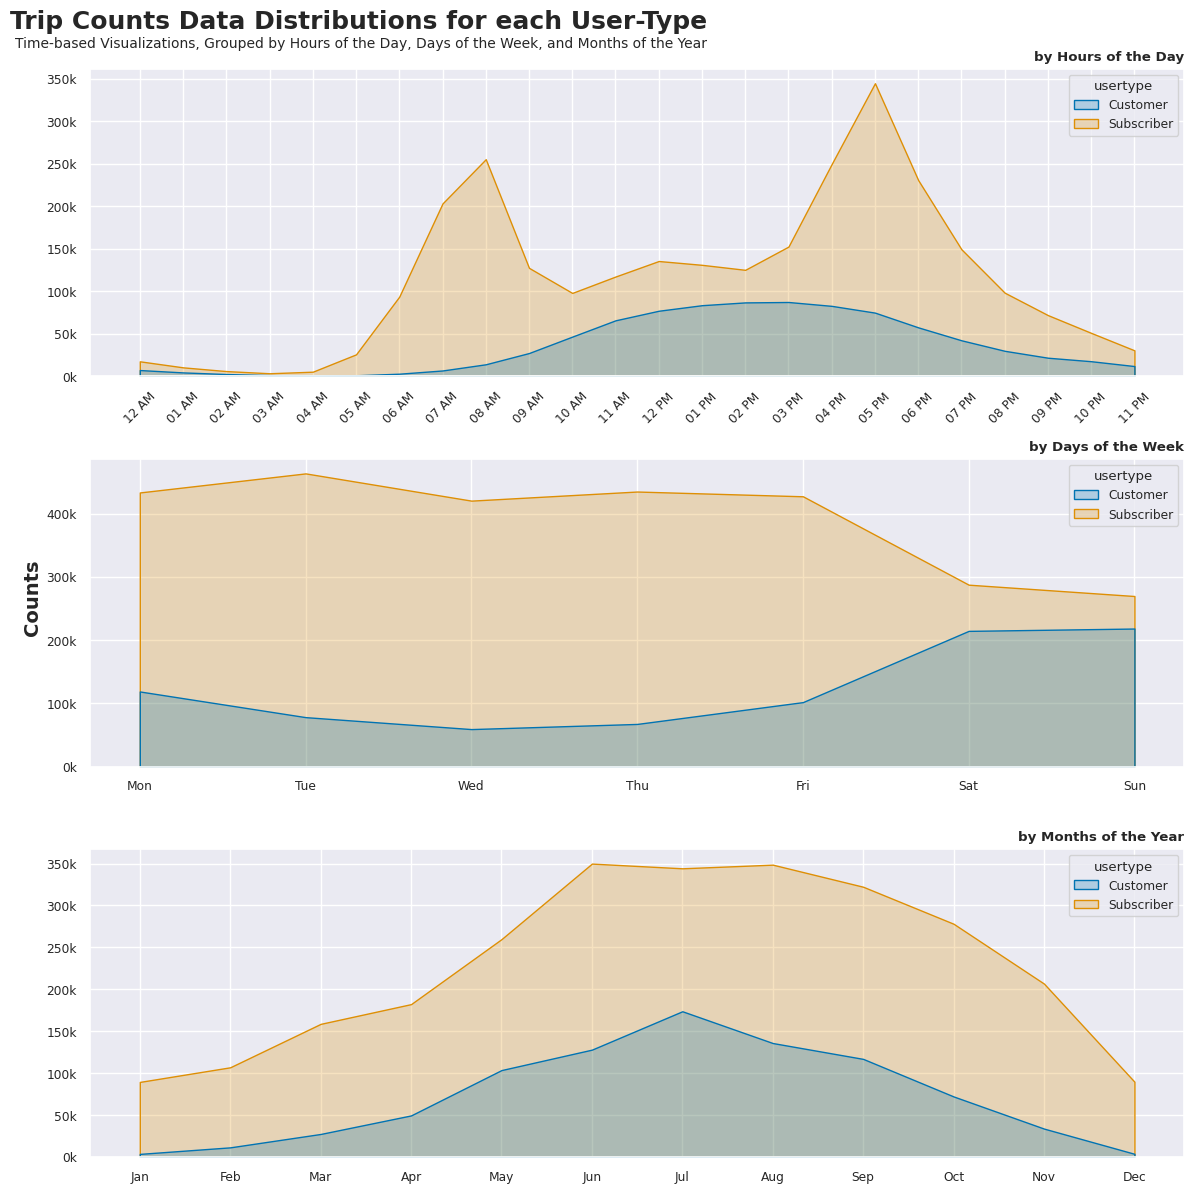

In [25]:
# Create visualization
# Create plt figures and grids 
fig, ax= plt.subplots(3, figsize=(12, 12))

# Add Figure title and subtitle
fig.suptitle('Trip Counts Data Distributions for each User-Type', x=0.3, y=0.99, fontsize=18, fontweight='bold')
fig.supylabel('Counts', fontsize=14, fontweight='bold')
fig.text(0.014, 0.958, 'Time-based Visualizations, Grouped by Hours of the Day, Days of the Week, and Months of the Year', 
         fontsize=10, fontweight='light')

# Create bar plot
sns.histplot(data=trips_times_df, ax=ax[0], x="trip_start_hour", hue="usertype", element="poly")
# Set subplot title
ax[0].set_title('by Hours of the Day', loc='right', fontweight='bold')
# Set axis ticker numbers format
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'k'))
# Set axis label
ax[0].set_ylabel('')
ax[0].set_xlabel('')
# Set ticks parameter
ax[0].tick_params(axis='x', labelrotation=45)

# Create bar plot
sns.histplot(data=trips_times_df, ax=ax[1], x="trip_start_day", hue="usertype", element="poly")
# Set subplot title
ax[1].set_title('by Days of the Week', loc='right', fontweight='bold')
# Set axis ticker numbers format
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'k'))
# Set axis label
ax[1].set_ylabel('')
ax[1].set_xlabel('')

# Create bar plot
sns.histplot(data=trips_times_df, ax=ax[2], x="trip_start_month", hue="usertype", element="poly")
# Set subplot title
ax[2].set_title('by Months of the Year', loc='right', fontweight='bold')
# Set axis ticker numbers format
ax[2].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'k'))
# Set axis label
ax[2].set_ylabel('')
ax[2].set_xlabel('')

# Adjust the figure layout and display
fig.tight_layout()
plt.show()

Interesting insights to highlight from these visualizations:
- Peak usage hours for "Subscribers" occur around 8 AM and 5 PM, while "Customers" have high usage hours between 1 PM and 4 PM.
- "Subscribers" tend to use the bike-sharing service more on weekdays, while "Customers" prefer weekends.
- Both "Subscribers" and "Customers" exhibit similar trends in usage by months of the year. Usage grows at the beginning of the year, peaks around mid-year, and gradually declines towards the end of the year.


Notice that the first and second insights for the "Subscriber" user-type may indicate the use of the bike-sharing service for work transportation. To make this clearer, let's look at the combination of days and hours of usage, visualized together.

In [26]:
# Pivot subscriber trip start time by day and hour for count 
subscriber_trips_pivot_day_hour = trips_times_df[(trips_times_df['usertype'] == 'Subscriber')].pivot_table('trip_id', index='trip_start_hour', 
                                                                                                           columns='trip_start_day', aggfunc={'trip_id':'count'})
# Pivot customer trip start time by day and hour for count 
customer_trips_pivot_day_hour = trips_times_df[(trips_times_df['usertype'] == 'Customer')].pivot_table('trip_id', index='trip_start_hour', 
                                                                                                       columns='trip_start_day', aggfunc={'trip_id':'count'})

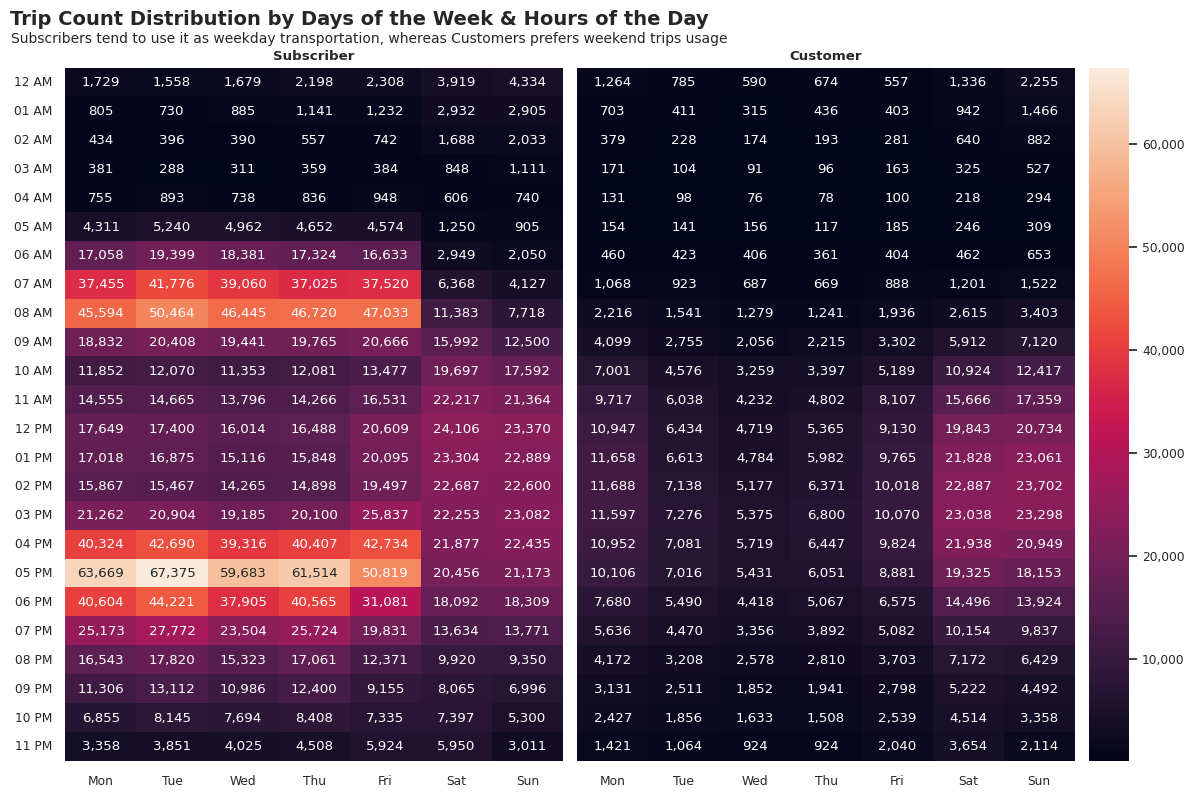

In [27]:
# Create visualization
# Create plt figures and grids 
fig, ax= plt.subplots(1, 3, figsize=(12, 8), gridspec_kw={'width_ratios':[1, 1, 0.08]})

# Add Figure title and subtitle
fig.suptitle('Trip Count Distribution by Days of the Week & Hours of the Day', x=0.3, y=0.99, fontsize=14, fontweight='bold')
fig.text(0.01, 0.949, 'Subscribers tend to use it as weekday transportation, whereas Customers prefers weekend trips usage', 
         fontsize=10, fontweight='light')

# Set vmin and vmax variables for a consistent color bar
vmin = min(subscriber_trips_pivot_day_hour.min(axis=None), customer_trips_pivot_day_hour.min(axis=None))
vmax = max(subscriber_trips_pivot_day_hour.max(axis=None), customer_trips_pivot_day_hour.max(axis=None))

# Create heatmap (Subscriber) visualization
sns.heatmap(data=subscriber_trips_pivot_day_hour, ax=ax[0], annot=True, fmt=',.0f', cbar=False, vmin=vmin, vmax=vmax)
# Set subplot title
ax[0].set_title('Subscriber', loc='center', fontweight='bold')
# Set axis label
ax[0].set_ylabel('')
ax[0].set_xlabel('')

# Create heatmap (Customer) visualization
sns.heatmap(data=customer_trips_pivot_day_hour, ax=ax[1], annot=True, fmt=',.0f', cbar_ax=ax[2], cbar_kws={'format':'{x:,.0f}'}, vmin=vmin, vmax=vmax)
# Set subplot title
ax[1].set_title('Customer', loc='center', fontweight='bold')
# Set axis label
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_yticks([])

# Tighten figure layout and display
fig.tight_layout()
plt.show()

Things to note:

- It becomes more apparent that "Subscribers" use the bike-sharing service for work transportation. The "hotspot" usage times are around 8 AM and 5 PM on weekdays, corresponding to common work commute times.
- Meanwhile, "Customers" have peak usage between 1 PM and 4 PM on weekends. This suggests that "Customer" bike-sharing usage is primarily for recreational purposes on weekends.

Returning to the third insight we discussed earlier: why is there a common trend with peak usage around mid-year? Trends over the months of the year might be related to seasons. In the context of the bike-sharing service, we can assume that seasons correlate with user behavior due to factors like convenience. We observe a lower trend around the beginning and end of the year, which may be due to winter. The trend aligns with lower temperatures.  

However, to confirm this interpretation, let's look at data regarding average temperatures for the specific location and period. Fortunately, the [National Weather Service](https://en.wikipedia.org/wiki/National_Weather_Service) provides an [official data source of climates](https://www.weather.gov/wrh/climate?wfo=lot), including data for the Chicago area. For this case, let's use the Monthly Average (or Mean) Temperatures data for the Chicago area in 2016
.

In [28]:
# Load 'avg_temp' data table
avg_temp_df = pd.read_csv(r"clean_data_source/2016_chicago_monthly_avg_temperature_noaa.csv", dtype={'month': 'string', 'mean': 'float'}, sep=';')
# Set the order of month categories 
avg_temp_df['month'] = pd.Categorical(avg_temp_df['month'], categories=month_order)

In [29]:
# Group and count by month 
trip_count_by_months = trips_times_df.groupby(['trip_start_month', 'usertype'], observed=False)['trip_id'].count().reset_index()
# Join with avg temp df
trip_count_by_months = trip_count_by_months.join(avg_temp_df.set_index('month'), on='trip_start_month')
# Rename attributes to align with data description
trip_count_by_months.rename(columns={'trip_id': 'trip_count', 'mean': 'mean_temp_f'}, inplace=True)

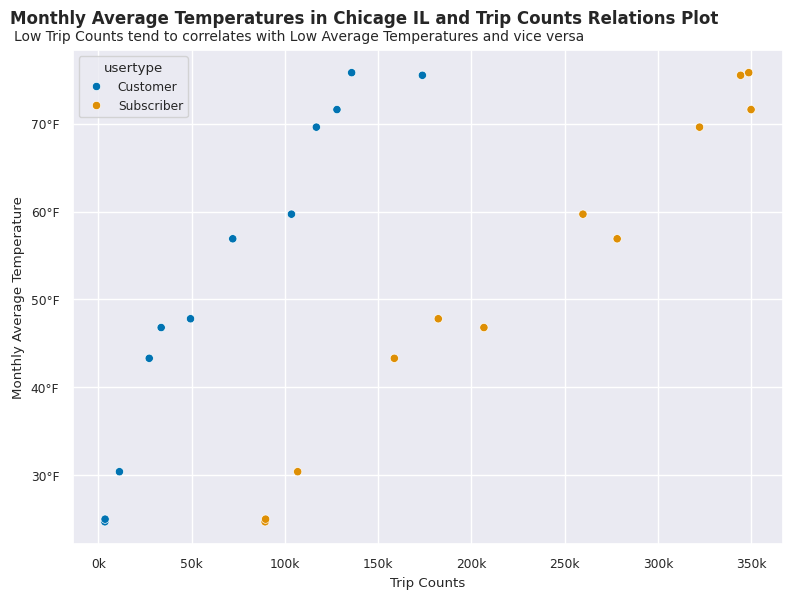

In [30]:
# Create visualization
# Create plt figures and grids 
fig, ax= plt.subplots(1, figsize=(8, 6))

# Add Figure title and subtitle
fig.suptitle('Monthly Average Temperatures in Chicage IL and Trip Counts Relations Plot', x=0.458, y=0.99, fontsize=12, fontweight='bold')
fig.text(0.02, 0.938, 'Low Trip Counts tend to correlates with Low Average Temperatures and vice versa', 
         fontsize=10, fontweight='light')

# Create heatmap (Subcriber) viz
sns.scatterplot(ax=ax, data=trip_count_by_months, x='trip_count', y='mean_temp_f', hue='usertype')
# Set axis ticker numbers format
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'k'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x) + '°F'))
# Set axis label
ax.set_xlabel('Trip Counts')
ax.set_ylabel('Monthly Average Temperature')

# Tighten figure layout then show
fig.tight_layout()
plt.show()

It's worth noting that low temperatures are associated with fewer trips by users, reinforcing the idea that bike users are influenced by cold weather.

### Route Analysis
We have data for each trip's starting and ending stations. It's possible that both user types have popular routes. We can begin by identifying frequently used start and end stations for casual customers and subscribers.


In [31]:
# Create a copy to preserve the original data frame
trips_stations_df = trips_df.copy()

In [32]:
# Create a data frame for start station counts
start_station_count = trips_stations_df.groupby(['from_station_id', 'usertype'], observed=False)['trip_id'].count().reset_index()
# Rename columns 
start_station_count.rename(columns={'trip_id': 'trip_count'}, inplace=True)
# Add a column for trip count percentages relative to each user type's total trip count
start_station_count = start_station_count.assign(percent_to_usertype_total=lambda x: x['trip_count'] / x.groupby('usertype', observed=False)['trip_count'].transform('sum') * 100)

# Sort and filter the top 5 stations for each user type
top_5_start_station = pd.concat([start_station_count[(start_station_count['usertype'] == 'Customer')].sort_values('trip_count', ascending=False).head(5),
                                start_station_count[(start_station_count['usertype'] == 'Subscriber')].sort_values('trip_count', ascending=False).head(5)])

# Enrich the data by joining with the main station dataset
top_5_start_station = top_5_start_station.join(stations_df.set_index('id'), on='from_station_id')

In [33]:
# Create a data frame for end station counts
end_station_count = trips_stations_df.groupby(['to_station_id', 'usertype'], observed=False)['trip_id'].count().reset_index()
# Rename columns 
end_station_count.rename(columns={'trip_id': 'trip_count'}, inplace=True)
# Add a column for trip count percentages relative to each user type's total trip count
end_station_count = end_station_count.assign(percent_to_usertype_total=lambda x: x['trip_count'] / x.groupby('usertype', observed=False)['trip_count'].transform('sum') * 100)

# Sort and filter top 5 stations for each usertype
top_5_end_station = pd.concat([end_station_count[(end_station_count['usertype'] == 'Customer')].sort_values('trip_count', ascending=False).head(5),
                                end_station_count[(end_station_count['usertype'] == 'Subscriber')].sort_values('trip_count', ascending=False).head(5)])

# Enrich the data by joining with the main station dataset
top_5_end_station = top_5_end_station.join(stations_df.set_index('id'), on='to_station_id')

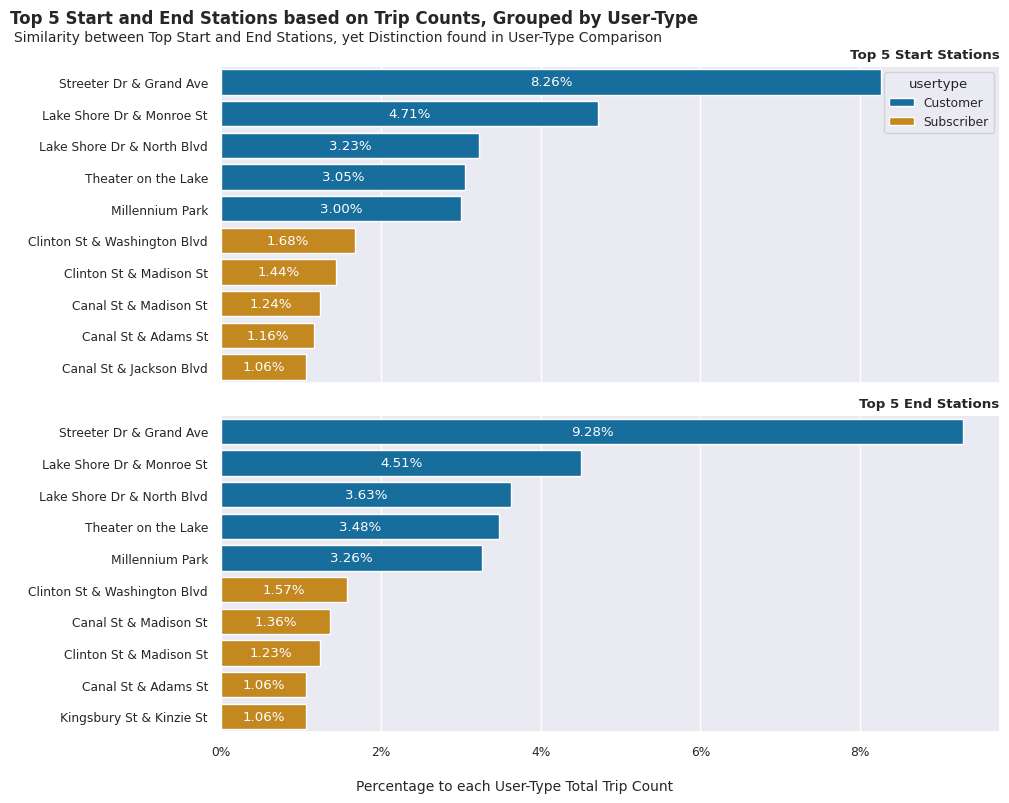

In [34]:
# Create visualization
# Create plt figures and grids 
fig, ax= plt.subplots(2, figsize=(10, 8), sharex=True)

# Add Figure title and subtitle
fig.suptitle('Top 5 Start and End Stations based on Trip Counts, Grouped by User-Type', x=0.34, y=0.99, fontsize=12, fontweight='bold')
fig.text(0, 0.95, 'Similarity between Top Start and End Stations, yet Distinction found in User-Type Comparison', 
         fontsize=10, fontweight='light')
fig.supxlabel('Percentage to each User-Type Total Trip Count', fontsize=10)

# Add barplot for start station
sns.barplot(ax=ax[0], data=top_5_start_station, x='percent_to_usertype_total', y='station_name', orient='y', hue='usertype')
# Set axis ticker numbers format
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x) + '%'))
# Set subplot title
ax[0].set_title('Top 5 Start Stations', loc='right', fontweight='bold')
# Set axis labels
ax[0].set_xlabel('')
ax[0].set_ylabel('')
# Add data label in barplot
for container in ax[0].containers:
    ax[0].bar_label(container, label_type='center', fmt=ticker.FuncFormatter(lambda x, pos: '{:,.2f}%'.format(x)), 
                  color='white')
    
# Add barplot for end station
sns.barplot(ax=ax[1], data=top_5_end_station, x='percent_to_usertype_total', y='station_name', orient='y', hue='usertype')
# Set axis ticker numbers format
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x) + '%'))
# Set subplot title
ax[1].set_title('Top 5 End Stations', loc='right', fontweight='bold')
# Set axis labels
ax[1].set_xlabel('')
ax[1].set_ylabel('')
# Remove legend
ax[1].get_legend().remove()
# Add data label in barplot
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center', fmt=ticker.FuncFormatter(lambda x, pos: '{:,.2f}%'.format(x)), 
                  color='white')

# Tighten figure layout then show
fig.tight_layout()
plt.show()

The chart above displays the most popular stations for each user type. It's worth noting that the top starting stations are mostly the same as the top ending stations. However, there are differences in favorite stations between user types. Based on the station names, it's reasonable to assume that names like "Park" or "Theater" refer to recreational places, which are part of the favorite stations for "Customer" user types.

To confirm this, let's examine the locations of the top stations using station coordinates (latitude and longitude). For geographical data visualization, we'll use the "Plotly" Python library. This library provides interactive HTML visualizations, allowing actions such as zooming in and out, hovering over plots to see data details, and filtering by legend categories.

In [35]:
# Create a column to differentiate 'Start' or 'End' station 
top_5_start_station = top_5_start_station.assign(station_type='Top Start Station')
top_5_end_station = top_5_end_station.assign(station_type='Top End Station')

# Rename columns to match
top_5_start_station.rename(columns={'from_station_id': 'station_id'}, inplace=True)
top_5_end_station.rename(columns={'to_station_id': 'station_id'}, inplace=True)

# Merge into one data frame of top stations
top_5_station = pd.concat([top_5_start_station, top_5_end_station])
# Adjust percent values to decimals
top_5_station['percent_to_usertype_total'] = top_5_station['percent_to_usertype_total'].apply(lambda x: x/100)

/home/muyoo21/google_da_course/capstone_project_cyclistic/env/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(required_grouper, sort=False)  # skip one_group groupers


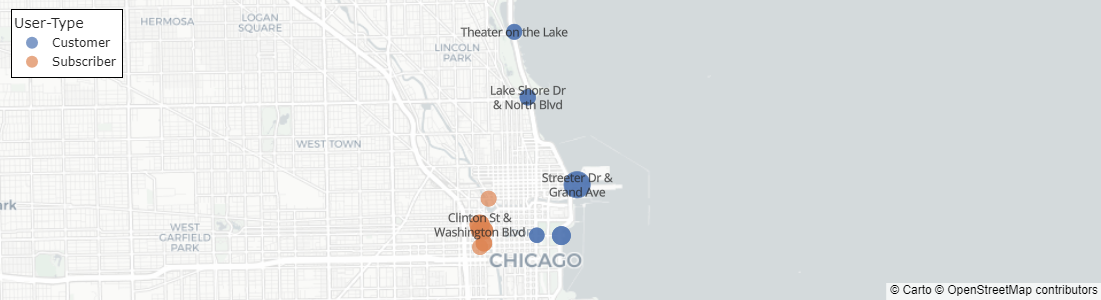

In [36]:
# Import library
import plotly.express as px

# Set up figure properties
fig = px.scatter_mapbox(top_5_station, lat='latitude', lon='longitude', color='usertype', zoom=11.2, height=300, template='seaborn',
                        text='station_name', center={'lat':41.90, 'lon':-87.62}, size='trip_count', hover_name='station_name',
                        hover_data={'station_id': True,
                                    'station_type': True, 
                                    'usertype': True,
                                    'trip_count': ':,.0f', 
                                    'percent_to_usertype_total': ':.2%', 
                                    'dpcapacity': False,
                                    'latitude': False,
                                    'longitude': False,
                                    'station_name': False,
                                    'online_date': False
                                   },
                        labels={'station_id': 'Station ID', 
                                'station_type': 'Station Type',
                                'usertype': 'User-Type',
                                'trip_count': 'Trips Count', 
                                'percent_to_usertype_total': 'Percentage to User-Type Total Trips Count'
                                }
                       )

# Set up additional properties
fig.update_layout(mapbox_style='carto-positron', margin={'r':0,'t':0,'l':0,'b':0},
                  legend=dict(x=0.01,
                              y=0.97,
                              bordercolor='Black',
                              borderwidth=1
                             )
                  )

# Show figure
fig.show()

For each user type, top stations form distinct clusters:
- "Customer" favorite stations are typically near the shore and close to recreational places, aligning with our prediction that "Customer" users mainly use the bike-sharing service for recreational purposes.
- In contrast, "Subscriber" top stations are located in the town center, where offices and businesses are concentrated. As expected, "Subscribers" use the bike-sharing service for commuting to work.

Next, let's explore the popular routes for each user type.


In [37]:
# Create a data frame for trip route counts
trip_route_count = trips_stations_df.groupby(['from_station_id', 'to_station_id', 'usertype'], observed=False)['trip_id'].count().reset_index()
# Rename columns 
trip_route_count.rename(columns={'trip_id': 'trip_count', 'from_station_id': 'start_station_id', 'to_station_id': 'end_station_id'}, inplace=True)
# Add a column for trip count percentages relative to each user type's total trip count
trip_route_count = trip_route_count.assign(percent_to_usertype_total=lambda x: x['trip_count'] / x.groupby('usertype', observed=False)['trip_count'].transform('sum'))

# Sort and filter top 5 routes for each usertype
top_5_route = pd.concat([trip_route_count[(trip_route_count['usertype'] == 'Customer')].sort_values('trip_count', ascending=False).head(5),
                         trip_route_count[(trip_route_count['usertype'] == 'Subscriber')].sort_values('trip_count', ascending=False).head(5)])


# Create a summary of top route station data
top_route_station = pd.concat([top_5_route['start_station_id'], top_5_route['end_station_id']])
top_route_station.name = 'id'
top_route_station = pd.merge(top_route_station, stations_df, on='id', how='left')
top_route_station.drop_duplicates(inplace=True)

# Enrich start stations data with join from stations main dataset
top_5_route = top_5_route.join(stations_df[['id', 'station_name', 'latitude', 'longitude']].set_index('id'), on='start_station_id')
# Rename columns 
top_5_route.rename(columns={'station_name': 'start_station_name', 'latitude': 'start_latitude', 'longitude': 'start_longitude'}, inplace=True)
# Enrich end stations data with join from stations main dataset
top_5_route = top_5_route.join(stations_df[['id', 'station_name', 'latitude', 'longitude']].set_index('id'), on='end_station_id')
# Rename columns 
top_5_route.rename(columns={'station_name': 'end_station_name', 'latitude': 'end_latitude', 'longitude': 'end_longitude'}, inplace=True)

In [38]:
top_5_route

start_station_id  end_station_id    usertype  trip_count  \
79078                 76              35    Customer       10063   
36084                 35              35    Customer        7286   
36158                 35              76    Customer        5999   
36514                 35             268    Customer        5862   
285914               268              35    Customer        5625   
159397               153             115  Subscriber        2376   
117637               115             153  Subscriber        2222   
302435               283             174  Subscriber        2125   
45633                 43             174  Subscriber        2111   
36343                 35             177  Subscriber        2103   

        percent_to_usertype_total              start_station_name  \
79078                        0.01       Lake Shore Dr & Monroe St   
36084                        0.01         Streeter Dr & Grand Ave   
36158                        0.01         Streeter Dr & Grand Ave   
36514                        0.01         Streeter Dr & Grand Ave   
285914                       0.01      Lake Shore Dr & North Blvd   
159397                       0.00  Southport Ave & Wellington Ave   
117637                       0.00  Sheffield Ave & Wellington Ave   
302435                       0.00       LaSalle St & Jackson Blvd   
45633                        0.00    Michigan Ave & Washington St   
36343                        0.00         Streeter Dr & Grand Ave   

        start_latitude  start_longitude                end_station_name  \
79078            41.88           -87.62         Streeter Dr & Grand Ave   
36084            41.89           -87.61         Streeter Dr & Grand Ave   
36158            41.89           -87.61       Lake Shore Dr & Monroe St   
36514            41.89           -87.61      Lake Shore Dr & North Blvd   
285914           41.91           -87.63         Streeter Dr & Grand Ave   
159397           41.94           -87.66  Sheffield Ave & Wellington Ave   
117637           41.94           -87.65  Southport Ave & Wellington Ave   
302435           41.88           -87.63           Canal St & Madison St   
45633            41.88           -87.62           Canal St & Madison St   
36343            41.89           -87.61             Theater on the Lake   

        end_latitude  end_longitude  
79078          41.89         -87.61  
36084          41.89         -87.61  
36158          41.88         -87.62  
36514          41.91         -87.63  
285914         41.89         -87.61  
159397         41.94         -87.65  
117637         41.94         -87.66  
302435         41.88         -87.64  
45633          41.88         -87.64  
36343          41.93         -87.63

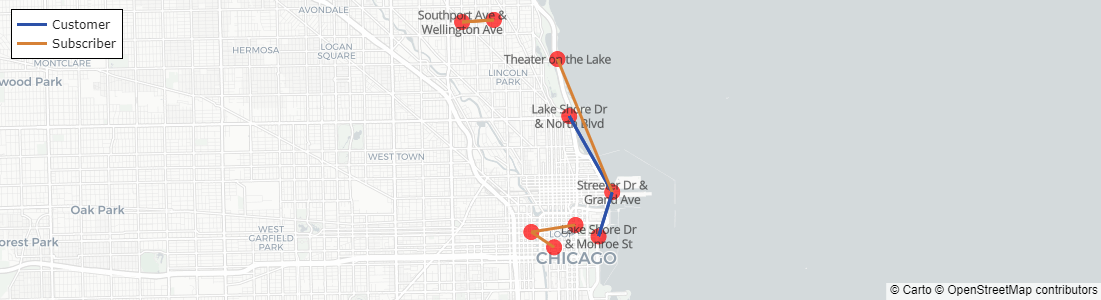

In [39]:
import plotly.graph_objects as go
import numpy as np

# Set up figure properties
fig = px.scatter_mapbox(top_route_station, lat='latitude', lon='longitude', zoom=11, height=300, template='seaborn',
                        text='station_name', hover_name='station_name',
                        hover_data={'id': True,
                                    'latitude': ':.2f',
                                    'longitude': ':.2f',
                                    'station_name': False,
                                    'dpcapacity': False,
                                    'online_date': False
                                   },
                        labels={'id': 'Station ID',
                                'latitude': 'Lat',
                                'longitude': 'Lon'
                                }
                       )

# Update stations traces
fig.update_traces(marker=dict(size=17,
                              color='rgb(255, 0, 0)',
                              opacity=0.7
                              ),
                  selector=dict(type='scattermapbox')
                 )

# Add route traces
for i in range(len(top_5_route)):
    # Only show legend group not items
    show_legend = (i == 0 or i == 5)
    # Set custom data array
    custom_data = [top_5_route['usertype'].iloc[i], top_5_route['trip_count'].iloc[i], top_5_route['percent_to_usertype_total'].iloc[i]]
    # Parse custom data array to plotly format
    custom_data_container = np.empty(shape=(2,3,1), dtype='object')
    custom_data_container[0] = np.array(custom_data).reshape(-1,1)
    custom_data_container[1] = np.array(custom_data).reshape(-1,1)
    # Create line
    fig.add_scattermapbox(lat=[top_5_route['start_latitude'].iloc[i], top_5_route['end_latitude'].iloc[i]],
                          lon=[top_5_route['start_longitude'].iloc[i], top_5_route['end_longitude'].iloc[i]],
                          mode='lines',
                          legendgroup=str(top_5_route['usertype'].iloc[i]),
                          name=str(top_5_route['usertype'].iloc[i]),
                          showlegend=show_legend,
                          hovertext=['Route: {}-{} to {}-{}'.format(top_5_route['start_station_name'].iloc[i], top_5_route['start_station_id'].iloc[i], top_5_route['end_station_name'].iloc[i], top_5_route['end_station_id'].iloc[i]),
                                     'Route: {}-{} to {}-{}'.format(top_5_route['start_station_name'].iloc[i], top_5_route['start_station_id'].iloc[i], top_5_route['end_station_name'].iloc[i], top_5_route['end_station_id'].iloc[i])],
                          customdata=custom_data_container,
                          hovertemplate =
                              '<b>%{hovertext}</b><br><br>'+
                              'User-Type=%{customdata[0]}<br>'+
                              'Trips Count=%{customdata[1]:,.0f}<br>'+
                              'Percentage to User-Type Total Trips Count=%{customdata[2]:.2%}'+
                              '<extra></extra>'
                         )

# Update customer route traces
fig.update_traces(line=dict(width=3,
                            color='rgb(44, 81, 168)'
                            ),
                  selector=dict(mode='lines',
                                legendgroup='Customer')
                 )

# Update subscriber route traces
fig.update_traces(line=dict(width=3,
                            color='rgb(214, 129, 54)'
                            ),
                  selector=dict(mode='lines',
                                legendgroup='Subscriber')
                 )

# Set up additional properties
fig.update_layout(mapbox_style='carto-positron', margin={'r':0,'t':0,'l':0,'b':0},
                  legend=dict(x=0.01,
                              y=0.97,
                              bordercolor='Black',
                              borderwidth=1
                             )
                  )

# Show figure
fig.show()

The map above reveals that the most used routes by "Customer" users are around the lake shore, close to their favorite stations mentioned earlier. In contrast, the top routes for "Subscriber" users involve different starting and ending stations, often near and around the shore. This might indicate weekend trips or recreational purposes for "Subscriber" users. However, it's worth noting that each of the top routes represents at most 0.08% of "Subscriber" total trips, suggesting that these routes do not significantly represent "Subscriber" preferences.

## Conclusion  

Based on the analysis we did above, on mission to answer the business problem; **How do they use Cyclistic bikes differently?**, here are several insights we can conclude:

1. **Trip Duration Analysis:** Casual customers ("Customer") tend to have longer trip durations than annual members ("Subscriber"). This is likely because "Customer" users pay for a 24-hour pass, making them more inclined to maximize the value of their pass. "Subscriber" users have more flexibility, leading to shorter average trip durations.

2. **User-type's Trip Frequency in 2016:** In 2016, Subscribers significantly contributed to the total number of trips, making over three times the number of trips compared to Customers. Subscribers accounted for approximately 76% of all trips, while Customers made around 24%.

3. **Time-Based Analysis:** Subscribers show peak usage around 8 AM and 5 PM on weekdays, aligning with typical work commute hours. In contrast, Customers prefer to use the bike-sharing service during the afternoon, primarily between 1 PM and 4 PM, and have a preference for weekends. The common trend in peak usage around mid-year might relate to seasons, as weather and temperature can affect bike riders.

4. **Route Analysis:** "Customers" prefer stations near the shore and recreational places, indicating a recreational usage pattern. "Subscribers" opt for stations in the town center, likely driven by work commuting. Popular routes for "Subcribers" and "Customers" showing a mix of work and recreation. It's important to note that the top routes represent only a small portion of total trips (below 1% for each route).

### Recommendations:

1. **Targeted Promotions:** Based on user behavior, consider launching targeted promotions during key time periods. For "Customers," focus on weekends and recreational activities, while for "Subscribers," emphasize work-related benefits during weekdays.

2. **Membership Offers:** To convert "Customers" into "Subscribers," offer enticing annual membership packages that highlight cost savings and convenience. Tailor the membership options to their usage patterns, e.g. exclusive weekends-only memberships.

3. **Localized Marketing:** Target specific areas based on user segments. For "Customers," focus marketing efforts near recreational areas and tourist destinations. For "Subscribers," concentrate on promoting stations around business districts.

4. **Pricing Tiers:** Implement flexible pricing tiers for different user segments. For "Customers," consider offering multi-ride packages to encourage longer-term usage. For "Subscribers," explore loyalty programs.

Remember, these recommendations are adaptable and should be fine-tuned based on the evolving needs of the user segments. Continuously experiment with different promotional offers, content, and marketing channels for both user segments. Use A/B testing to measure the effectiveness of these initiatives. Implementing a combination of these strategies can help the work toward the goal of converting casual customers into annual members.

### Data Limitations

The analysis is subject to certain data limitations that impact the comprehensiveness of the insight:
- **Limited Demographic Data:** The dataset provides incomplete user-type demographic information. Specifically, gender and birth year data are available only for Subscribers and are missing for Customers. This limitation restricts the ability to perform in-depth demographic analysis for all user-types.
  
- **Outliers Consideration:** While outliers have been considered and efforts were made to analyze them, the dataset includes various user behaviors, which can result in outliers. To mitigate potential bias and offer a more nuanced understanding, the dataset was divided into segments for separate analysis. This approach aids in uncovering trends within specific value ranges but may not provide a complete representation of the entire population's behavior.
  
- **Sampling Bias:** While the dataset is derived from the entire user population, the analysis primarily highlights common behavior and may not comprehensively represent user segments with unique patterns.
  
- **Seasonal Variations:** The dataset covers the year 2016, and while seasonal variations are observed in the analysis, it's important to consider that the data may not capture longer-term trends or changes that occur outside this time frame.
  
- **Geographical Specificity:** The analysis pertains to the operations in Chicago, and the insights may not be universally applicable to other locations or bike-sharing services.

Despite these limitations, the analysis provides valuable insights into user behavior, usage patterns, and the disparities between Customers and Subscribers, offering a foundation for data-backed marketing strategies to convert casual riders into annual members.